In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
488618,2020-08-31,Comal,Texas,48091.0,2969,95
593357,2020-10-03,Franklin,Idaho,16041.0,177,0
202982,2020-06-02,Fremont,Wyoming,56013.0,283,8
217900,2020-06-07,Fayette,Texas,48149.0,38,2
328095,2020-07-12,Smyth,Virginia,51173.0,43,1
331317,2020-07-13,King,Washington,53033.0,12101,639
145827,2020-05-15,Livingston,Illinois,17105.0,25,1
490918,2020-09-01,Nance,Nebraska,31125.0,11,0
572926,2020-09-26,Stephens,Texas,48429.0,134,4
497831,2020-09-03,Haskell,Oklahoma,40061.0,174,4


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
430745,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14
556838,2020-09-21,Charlottesville city,Virginia,51540.0,1085,28,14.0,23.29
296274,2020-07-02,Charlottesville city,Virginia,51540.0,218,5,2.0,3.57
356766,2020-07-21,Albemarle,Virginia,51003.0,638,10,10.0,8.57
280516,2020-06-27,Charlottesville city,Virginia,51540.0,200,3,4.0,4.86
202684,2020-06-02,Albemarle,Virginia,51003.0,200,8,1.0,5.57
472727,2020-08-26,Charlottesville city,Virginia,51540.0,595,17,3.0,4.14
32904,2020-04-04,Albemarle,Virginia,51003.0,27,0,1.0,1.57
249189,2020-06-17,Charlottesville city,Virginia,51540.0,161,3,1.0,2.71
141900,2020-05-13,Albemarle,Virginia,51003.0,126,4,2.0,2.29


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
1518,".Franklin County, Missouri",103967.0,Franklin,Missouri
368,".Osceola County, Florida",375751.0,Osceola,Florida
2143,".Cimarron County, Oklahoma",2137.0,Cimarron,Oklahoma
3072,".Iron County, Wisconsin",5687.0,Iron,Wisconsin
2383,".Edmunds County, South Dakota",3829.0,Edmunds,South Dakota
1245,".Charlevoix County, Michigan",26143.0,Charlevoix,Michigan
2884,".Nottoway County, Virginia",15232.0,Nottoway,Virginia
2680,".Marion County, Texas",9854.0,Marion,Texas
2097,".Miami County, Ohio",106987.0,Miami,Ohio
1038,".Hancock County, Kentucky",8722.0,Hancock,Kentucky


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
192,2020-09-29,Albemarle,Virginia,51003.0,1283,21,9.0,11.57,".Albemarle County, Virginia",109330.0,10.582640
193,2020-09-30,Albemarle,Virginia,51003.0,1306,21,23.0,14.71,".Albemarle County, Virginia",109330.0,13.454678
194,2020-10-01,Albemarle,Virginia,51003.0,1321,21,15.0,15.14,".Albemarle County, Virginia",109330.0,13.847983
195,2020-10-02,Albemarle,Virginia,51003.0,1337,21,16.0,14.86,".Albemarle County, Virginia",109330.0,13.591878
196,2020-10-03,Albemarle,Virginia,51003.0,1351,22,14.0,14.00,".Albemarle County, Virginia",109330.0,12.805268
197,2020-10-04,Albemarle,Virginia,51003.0,1368,22,17.0,16.14,".Albemarle County, Virginia",109330.0,14.762645
198,2020-10-05,Albemarle,Virginia,51003.0,1383,22,15.0,15.57,".Albemarle County, Virginia",109330.0,14.241288
199,2020-10-06,Albemarle,Virginia,51003.0,1385,22,2.0,14.57,".Albemarle County, Virginia",109330.0,13.326626
200,2020-10-07,Albemarle,Virginia,51003.0,1390,22,5.0,12.00,".Albemarle County, Virginia",109330.0,10.975944
201,2020-10-08,Albemarle,Virginia,51003.0,1409,22,19.0,12.57,".Albemarle County, Virginia",109330.0,11.497302


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
398,2020-09-29,Charlottesville city,Virginia,51540.0,1233,28,11.0,20.00,".Charlottesville city, Virginia",47266.0,42.313714
399,2020-09-30,Charlottesville city,Virginia,51540.0,1246,29,13.0,20.14,".Charlottesville city, Virginia",47266.0,42.609910
400,2020-10-01,Charlottesville city,Virginia,51540.0,1274,29,28.0,22.14,".Charlottesville city, Virginia",47266.0,46.841281
401,2020-10-02,Charlottesville city,Virginia,51540.0,1298,29,24.0,22.00,".Charlottesville city, Virginia",47266.0,46.545085
402,2020-10-03,Charlottesville city,Virginia,51540.0,1341,29,43.0,22.14,".Charlottesville city, Virginia",47266.0,46.841281
403,2020-10-04,Charlottesville city,Virginia,51540.0,1364,29,23.0,21.14,".Charlottesville city, Virginia",47266.0,44.725596
404,2020-10-05,Charlottesville city,Virginia,51540.0,1380,29,16.0,22.57,".Charlottesville city, Virginia",47266.0,47.751026
405,2020-10-06,Charlottesville city,Virginia,51540.0,1383,30,3.0,21.43,".Charlottesville city, Virginia",47266.0,45.339144
406,2020-10-07,Charlottesville city,Virginia,51540.0,1386,30,3.0,20.00,".Charlottesville city, Virginia",47266.0,42.313714
407,2020-10-08,Charlottesville city,Virginia,51540.0,1421,30,35.0,21.00,".Charlottesville city, Virginia",47266.0,44.429400


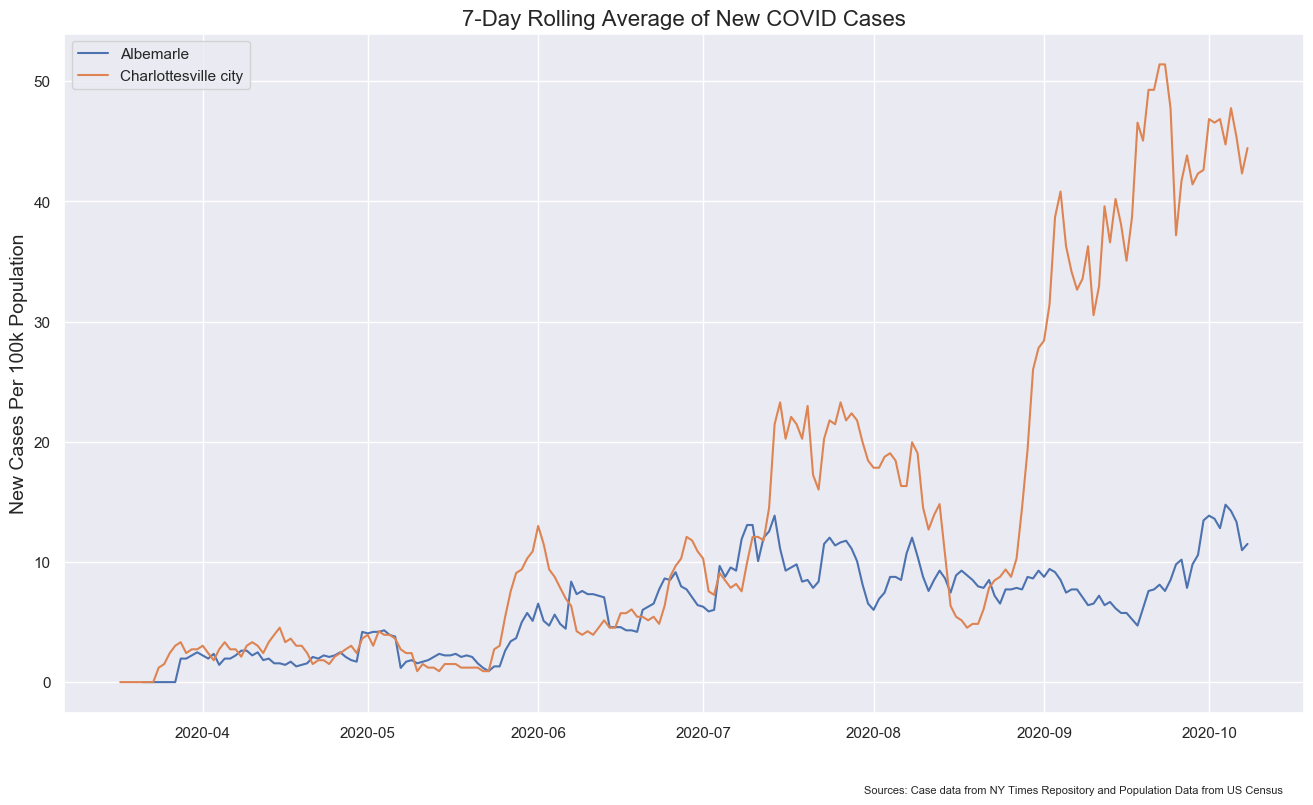

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')